# Advanced NLP
### SpaCy - Entity Recognition - Gensim - Word2Vec

### Key Terms:
- Part of speech tagging
- Entity recognition
- Word embedings

### Key Takeaways:

Two amazing libraries: 
- SpaCy: best for using other people's trained semantic analysis models.
- Gensim: best for training / using word embeding models such as Word2Vec.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

![](https://pbs.twimg.com/profile_images/699256981287100416/7-7zis8f_400x400.png)
# SpaCy

https://spacy.io/usage/linguistic-features

In [2]:
# !python -m spacy download en
import spacy
nlp = spacy.load('en')

In [3]:
raw_text = "Apple's valuation will tank if Google sells against Siri's new OS update that ignores Machine Learning."
spacy_text = nlp(raw_text)

In [4]:
spacy_text

Apple's valuation will tank if Google sells against Siri's new OS update that ignores Machine Learning.

In [5]:
spacy_text.ents

(Apple, Google, Siri, OS, Machine Learning)

In [6]:
from spacy import displacy

displacy.render(spacy_text, jupyter=True)

In [7]:
spacy_text.print_tree()

[{'word': 'tank',
  'lemma': 'tank',
  'NE': '',
  'POS_fine': 'VB',
  'POS_coarse': 'VERB',
  'arc': 'ROOT',
  'modifiers': [{'word': 'valuation',
    'lemma': 'valuation',
    'NE': '',
    'POS_fine': 'NN',
    'POS_coarse': 'NOUN',
    'arc': 'nsubj',
    'modifiers': [{'word': 'Apple',
      'lemma': 'Apple',
      'NE': 'ORG',
      'POS_fine': 'NNP',
      'POS_coarse': 'PROPN',
      'arc': 'poss',
      'modifiers': [{'word': "'s",
        'lemma': "'s",
        'NE': '',
        'POS_fine': 'POS',
        'POS_coarse': 'PART',
        'arc': 'case',
        'modifiers': []}]}]},
   {'word': 'will',
    'lemma': 'will',
    'NE': '',
    'POS_fine': 'MD',
    'POS_coarse': 'VERB',
    'arc': 'aux',
    'modifiers': []},
   {'word': 'sells',
    'lemma': 'sell',
    'NE': '',
    'POS_fine': 'VBZ',
    'POS_coarse': 'VERB',
    'arc': 'advcl',
    'modifiers': [{'word': 'if',
      'lemma': 'if',
      'NE': '',
      'POS_fine': 'IN',
      'POS_coarse': 'ADP',
      'arc': 'm

In [9]:
displacy.render(spacy_text, jupyter=True, style='ent')

# On the NY Times Comments Dataset

In [10]:
comments = pd.read_csv('https://raw.githubusercontent.com/mkleinbort/resource-datasets/master/ny_times_comments/commentBody.txt', squeeze=True, names=['commendBody'])

In [11]:
comments.head()

0    This project makes me happy to be a 30+ year T...
1    Stunning photos and reportage. Infuriating tha...
2    Brilliant work from conception to execution. I...
3    NYT reporters should provide a contributor's l...
4       Could only have been done in print. Stunning. 
Name: commendBody, dtype: object

In [12]:
for txt in comments.sample(5, random_state=4):
    print('_'*117)
    comment = nlp(txt)
    displacy.render(comment, jupyter=True, style='ent')

_____________________________________________________________________________________________________________________


_____________________________________________________________________________________________________________________


_____________________________________________________________________________________________________________________


_____________________________________________________________________________________________________________________


_____________________________________________________________________________________________________________________


# Word Vectorization

A pre-trained model needs to be downloaded - it takes a while.

In [16]:
# !python -m spacy download en_core_web_lg

In [17]:
%%time
nlp = spacy.load('en_core_web_lg')

CPU times: user 7.65 s, sys: 1.24 s, total: 8.89 s
Wall time: 8.92 s


In [18]:
raw_text = "The New York Times will be at the White House next Friday to interview POTUS regarding the latest summit."
spacy_text = nlp(raw_text)

displacy.render(spacy_text, jupyter=True, style='ent')

One incredible outcome of deep learning has been word-embeddings.

In [19]:
spacy_text.ents[0]

The New York Times

In [20]:
spacy_text.ents[0].vector.round(2)

array([ 0.13,  0.13, -0.21, -0.41,  0.12,  0.07, -0.07, -0.08,  0.27,
        2.03, -0.47, -0.14,  0.07, -0.24, -0.09,  0.02, -0.17,  1.35,
       -0.  , -0.14,  0.11, -0.13,  0.15, -0.22, -0.15,  0.12, -0.35,
        0.25, -0.14,  0.29, -0.11,  0.29,  0.17,  0.07,  0.1 ,  0.08,
       -0.12,  0.  , -0.18,  0.05, -0.12,  0.1 , -0.09,  0.01, -0.05,
       -0.08, -0.06,  0.05, -0.06, -0.1 , -0.16,  0.08, -0.14,  0.02,
       -0.16,  0.14,  0.23, -0.11,  0.15, -0.18, -0.25, -0.18, -0.11,
        0.09,  0.15,  0.12, -0.22,  0.21, -0.03,  0.17,  0.1 , -0.27,
       -0.06, -0.04,  0.22,  0.05,  0.08,  0.05,  0.18,  0.18,  0.06,
        0.22, -0.06, -0.03, -0.14, -0.21, -0.04,  0.18, -0.04, -0.18,
        0.03, -0.  , -0.18, -0.14,  0.08,  0.08,  0.08,  0.06,  0.18,
       -0.02,  0.11, -0.29, -0.08,  0.21, -0.02, -0.68,  0.16,  0.1 ,
       -0.11, -0.15,  0.15, -0.12,  0.29, -0.07, -0.02, -0.01,  0.28,
        0.16, -0.08, -0.17,  0.14,  0.01, -0.25,  0.01, -0.08, -0.04,
        0.14,  0.13,

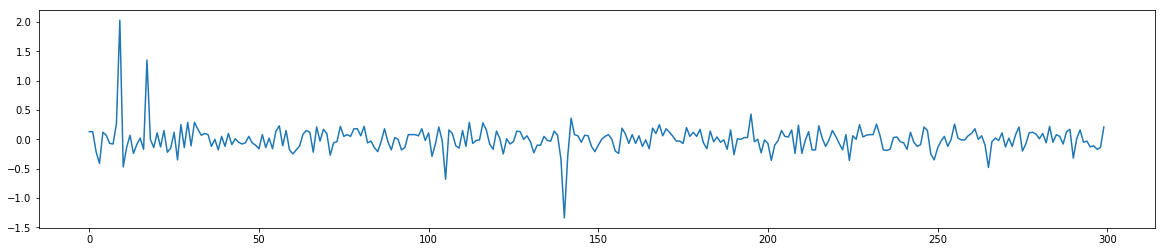

In [21]:
plt.figure(figsize=(20,4))
plt.plot(nlp('The New York Times').vector.round(2))

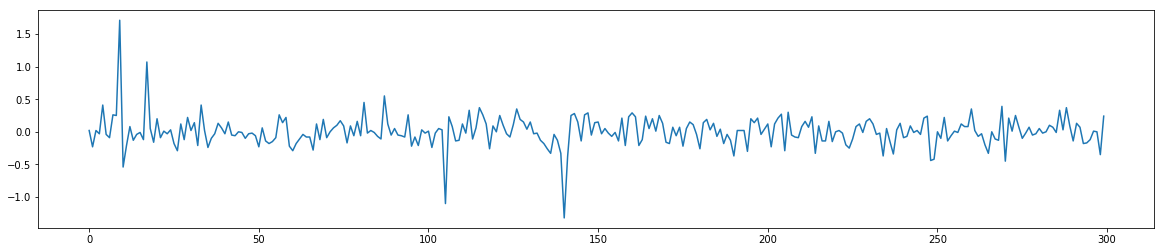

In [22]:
plt.figure(figsize=(20,4))
plt.plot(nlp('The Boston Globe').vector.round(2))

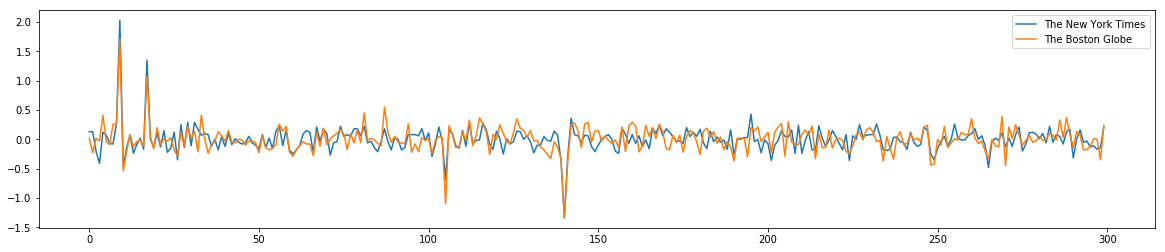

In [23]:
plt.figure(figsize=(20,4))
plt.plot(nlp('The New York Times').vector.round(2))
plt.plot(nlp('The Boston Globe').vector.round(2))
plt.legend(['The New York Times','The Boston Globe'])

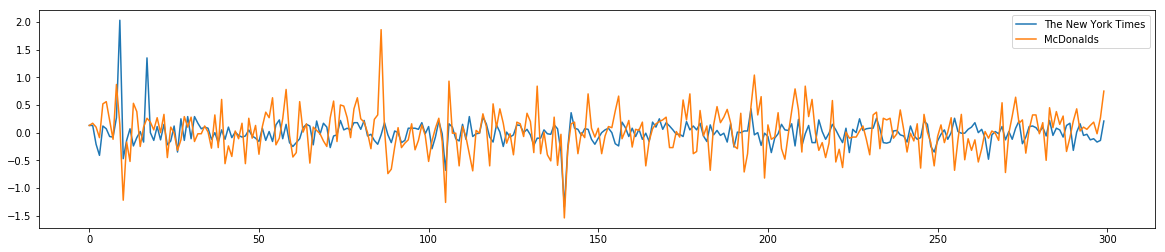

In [24]:
plt.figure(figsize=(20,4))
plt.plot(nlp('The New York Times').vector.round(2))
plt.plot(nlp('McDonalds').vector.round(2))
plt.legend(['The New York Times','McDonalds'])

# Computing similarity

For word vectors, similarity is defined using the cosine metric discussed in other lessons.

In [25]:
nytimes = nlp('The New York Times')
bostonglobe = nlp('The Boston Globe')
mcdonalds = nlp('McDonalds')

In [26]:
nytimes.similarity(bostonglobe)

0.7233688859895726

In [27]:
nytimes.similarity(mcdonalds)

0.23605994260815957

### Have some fun

![](https://images.typeform.com/images/6F2j2yxEmuhc/image/default)

# Gensim and Word2Vec

https://radimrehurek.com/gensim/models/word2vec.html

https://rare-technologies.com/word2vec-tutorial/


In [28]:
training_data = comments.apply(lambda x: x.lower().split())
training_data.head()

0    [this, project, makes, me, happy, to, be, a, 3...
1    [stunning, photos, and, reportage., infuriatin...
2    [brilliant, work, from, conception, to, execut...
3    [nyt, reporters, should, provide, a, contribut...
4    [could, only, have, been, done, in, print., st...
Name: commendBody, dtype: object

In [29]:
import gensim
from gensim.models import word2vec

model = word2vec.Word2Vec(sentences=training_data, workers=-1, size=300)

In [1]:
# model.wv.vocab

In [31]:
model.wv.most_similar('money')

[('lessen', 0.24638183414936066),
 ('critics,', 0.2335585653781891),
 ('landscape,', 0.22560447454452515),
 ('mite', 0.22508050501346588),
 ('euphemistic', 0.22216418385505676),
 ('machine"', 0.21795052289962769),
 ('cover', 0.21788981556892395),
 ('binghamton', 0.21569673717021942),
 ('tyranny.', 0.21425510942935944),
 ('foresight', 0.21222731471061707)]

to be honest, this data was not enough to capture the concept of `money`

# Google's trained model
https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit


For best results, the model needs to be trained on an unimaginably large amount of data. Top models have been trainind with:

- All of wikipedia
- Most of reddit
- Millions of GoogleNews articles



In [32]:
%%time
bigmodel = gensim.models.KeyedVectors.load_word2vec_format('/Users/mkleinbort/Downloads/GoogleNews-vectors-negative300.bin', binary=True)

CPU times: user 47.6 s, sys: 6.15 s, total: 53.7 s
Wall time: 55.1 s


In [33]:
%%time
bigmodel.wv.most_similar('money')

CPU times: user 8.44 s, sys: 26.6 s, total: 35 s
Wall time: 27.8 s


[('monies', 0.7165061235427856),
 ('funds', 0.7055203914642334),
 ('moneys', 0.6289055347442627),
 ('dollars', 0.628852367401123),
 ('cash', 0.6151220798492432),
 ('vast_sums', 0.605738639831543),
 ('fund', 0.5789710283279419),
 ('Money', 0.5733489990234375),
 ('taxpayer_dollars', 0.5693671703338623),
 ('Monies', 0.5586516857147217)]

In [34]:
bigmodel.wv.most_similar(positive=['king','woman'], negative=['man'])

[('queen', 0.7118192911148071),
 ('monarch', 0.6189674735069275),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411403656006)]

In [35]:
bigmodel.wv.most_similar(positive=['president'], negative=['goverment'])

[('vice_president', 0.5329017639160156),
 ('chief_executive', 0.5167220234870911),
 ('CEO', 0.48251986503601074),
 ('chairman', 0.4778040051460266),
 ('President', 0.4765218496322632),
 ('Vice_President', 0.4425591826438904),
 ('executive', 0.4380837082862854),
 ('CEOof', 0.4356497824192047),
 ('chief_executiveofficer', 0.43019843101501465),
 ('COO', 0.428392231464386)]

In [36]:
bigmodel.wv.most_similar(positive=['teacher'])

[('teachers', 0.7434303164482117),
 ('Teacher', 0.7094013690948486),
 ('guidance_counselor', 0.6960432529449463),
 ('elementary', 0.6790565252304077),
 ('PE_teacher', 0.6539357900619507),
 ('schoolteacher', 0.6529019474983215),
 ('school', 0.6382405757904053),
 ('pupil', 0.6304073333740234),
 ('student', 0.6301365494728088),
 ('paraprofessional', 0.625108003616333)]

In [37]:
bigmodel.wv.most_similar(positive=['teacher','medicine','child'])

[('pediatrician', 0.6126255393028259),
 ('children', 0.5897969007492065),
 ('nurse', 0.5811781883239746),
 ('kindergartner', 0.5761873722076416),
 ('preschooler', 0.5661839246749878),
 ('teachers', 0.5645489692687988),
 ('parents', 0.5571964979171753),
 ('school', 0.5482561588287354),
 ('mother', 0.5476572513580322),
 ('doctor', 0.5405358076095581)]

In [38]:
bigmodel.word_vec('president').round(2)

array([-0.01, -0.12,  0.14,  0.03, -0.02, -0.25,  0.1 , -0.15,  0.25,
       -0.18, -0.11,  0.04, -0.16,  0.01,  0.12,  0.22,  0.06,  0.06,
       -0.12, -0.2 , -0.23,  0.18,  0.05, -0.03,  0.13, -0.22, -0.08,
       -0.16, -0.15, -0.17, -0.11, -0.01, -0.25,  0.13,  0.43,  0.02,
       -0.04,  0.15, -0.  ,  0.15, -0.07, -0.11,  0.11,  0.18, -0.2 ,
       -0.23, -0.13,  0.08, -0.18,  0.25, -0.02,  0.05, -0.06,  0.03,
        0.09,  0.12, -0.18,  0.01,  0.06, -0.11,  0.08,  0.16, -0.07,
        0.29,  0.03,  0.17,  0.15,  0.04,  0.24,  0.15,  0.27,  0.05,
       -0.18, -0.21, -0.08, -0.05, -0.12,  0.06,  0.33, -0.06,  0.19,
        0.24, -0.05,  0.18,  0.02,  0.03, -0.3 , -0.19, -0.05,  0.14,
        0.23, -0.17,  0.05, -0.08, -0.15, -0.05, -0.07,  0.13,  0.1 ,
        0.08,  0.11, -0.22,  0.09,  0.09, -0.  ,  0.08, -0.02, -0.18,
       -0.16, -0.01, -0.04, -0.21,  0.07,  0.08,  0.12, -0.07,  0.19,
       -0.07,  0.36,  0.13, -0.07, -0.12, -0.06, -0.24, -0.03, -0.27,
       -0.22,  0.04,